#  DESAFIO 3.1 - BOOTCAMP MACHINE LEARNING

O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de
algoritmos de classificação. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas. Neste trabalho, devo classificar esse conjunto de dados com pelo menos dois algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos.


### OBJETIVO: Exercitar os seguintes conceitos trabalhados no Módulo:

1. Utilizar dois algoritmos de classificação para resolver um problema.
2. Fazer a análise deste problema com uso de métricas de qualidade, comparando as
soluções.
3. Tornar mais robusta a solução do problema com uso de validação cruzada e busca
de hiperparâmetros


In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
data = load_iris()

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [17]:
# Carregando os dados para análise.
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target_names'] = ['setosa' if numero == 0 else 'versicolor' if numero == 2 else 'virginica' for numero in data['target']]
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [18]:
# dados da base.
print(f'Número de colunas: {df.shape[1]}')
print(f'Número de linhas: {df.shape[0]}')

Número de colunas: 6
Número de linhas: 150


In [19]:
# informações gerais da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_names       150 non-null    object 
 5   target             150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
# Dados Estatística
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
# Tem dados null?
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target_names         0
target               0
dtype: int64

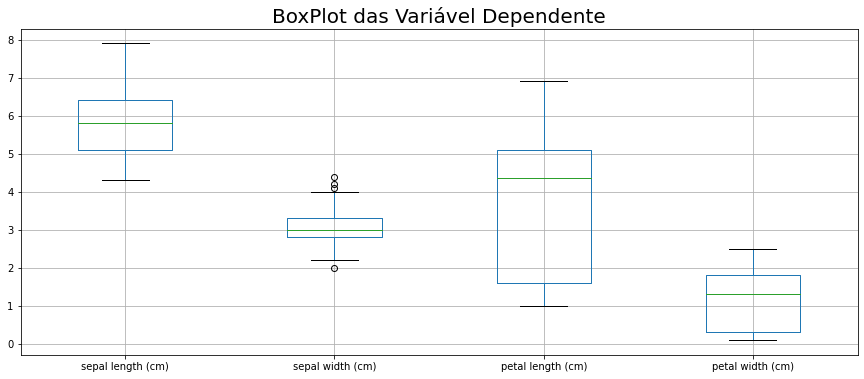

In [22]:
# BoxPlot das Variável Dependente.
plt.figure(figsize=(15,6))
df[['sepal length (cm)', 'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']].boxplot()
plt.title('BoxPlot das Variável Dependente', fontsize=20)
ax = plt.show

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


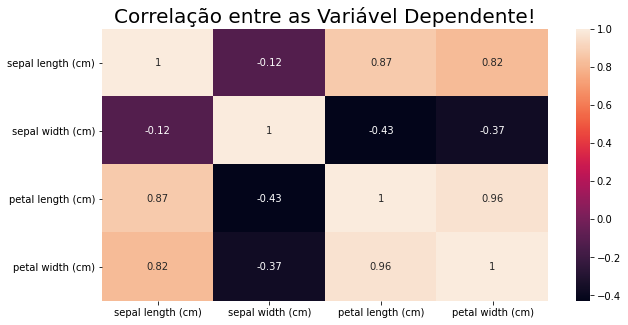

In [24]:
# Correlação entre as Variável Dependente!
dff = df[['sepal length (cm)', 'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.title('Correlação entre as Variável Dependente!', fontsize=20)
ax = plt.show()

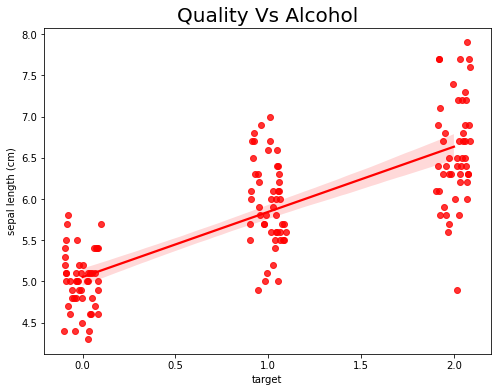

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(x="target", y="sepal length (cm)", x_jitter=0.1, color='r', data=df);
ax = plt.title("Quality Vs Alcohol", fontsize = 20)

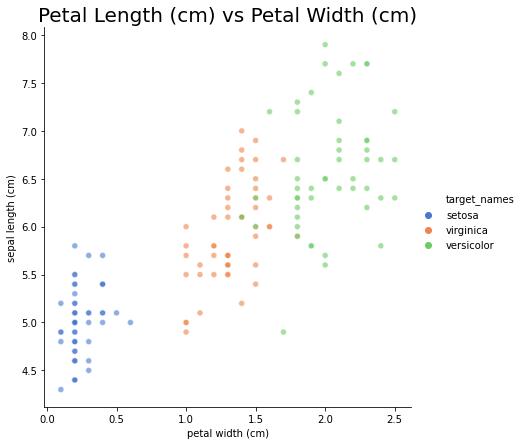

In [26]:
sns.relplot(x="petal width (cm)", y="sepal length (cm)", hue="target_names", alpha=.6, palette="muted",
            height=6, data=df)
ax = plt.title('Petal Length (cm) vs Petal Width (cm)', fontsize=20)

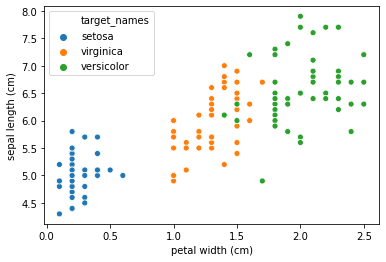

In [27]:
sns.scatterplot(x="petal width (cm)", y="sepal length (cm)", hue="target_names", data=df)

In [28]:
# # Normalizando nossos dados de entrada com os parâmetros default
# from sklearn.preprocessing import MinMaxScaler

# Scaler = MinMaxScaler()

# features_scaler = Scaler.fit_transform(features)
# new_dt = pd.DataFrame(features_scaler, columns=features.columns)
# new_dt.head(4)

In [29]:
# separando a base
from sklearn.model_selection import train_test_split as Split

X_train, X_test, Y_train, Y_test = Split(df.iloc[:,0:4],
                                         df.iloc[:,-1],
                                         random_state = 42,
                                         stratify = df.iloc[:,-1],
                                         test_size = 0.3)

## Construção do Modelo
* KNN
* RandomForest
* SVM
* MLP

### KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
predict = knn.predict(X_test)
result_knn = accuracy_score(Y_test, predict)

print(f'Accuracy KNeighborsClassifier: {round(result_knn * 100, 2)}%')

Accuracy KNeighborsClassifier: 95.56%


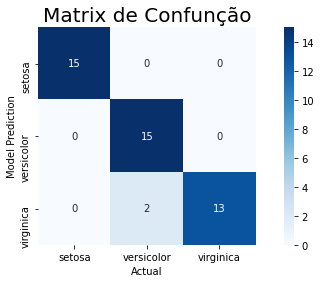

In [42]:
mat = confusion_matrix(Y_test, predict)

plt.figure(figsize=(10,4))
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
ax.set_xlabel('Actual')
ax.set_ylabel('Model Prediction')
ax.set_xticklabels(data.target_names)
ax.set_yticklabels(data.target_names)
ax.set_title('Matrix de Confunção', fontsize=20)
ax = plt.show()

### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(max_depth=10, random_state=1)
Rfc.fit(X_train, Y_train)
predict = Rfc.predict(X_test)
result_rfc = accuracy_score(Y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_rfc * 100, 2)}%')

Accuracy RandomForestClassifier: 91.11%


In [32]:
from sklearn.metrics import classification_report as cr

print(cr(Y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



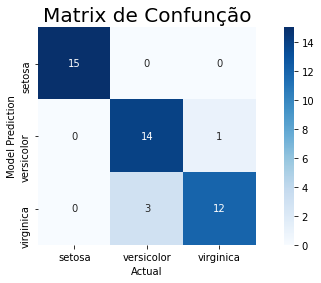

In [33]:
mat = confusion_matrix(Y_test, predict)

plt.figure(figsize=(10,4))
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
ax.set_xlabel('Actual')
ax.set_ylabel('Model Prediction')
ax.set_xticklabels(data.target_names)
ax.set_yticklabels(data.target_names)
ax.set_title('Matrix de Confunção', fontsize=20)
ax = plt.show()

### Support Vector Machine

In [34]:
from sklearn.svm import SVC

Svc = SVC(gamma='auto',kernel='rbf')
Svc.fit(X_train, Y_train)
predict = Svc.predict(X_test)
result_svc = accuracy_score(Y_test, predict)

print(f'Accuracy SVC: {round(result_svc * 100, 2)}%')

Accuracy SVC: 97.78%


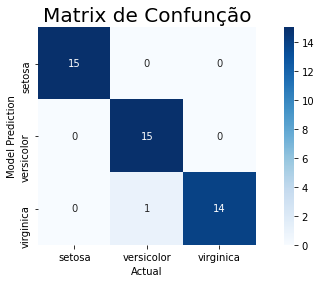

In [35]:
mat = confusion_matrix(Y_test, predict)

plt.figure(figsize=(10,4))
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
ax.set_xlabel('Actual')
ax.set_ylabel('Model Prediction')
ax.set_xticklabels(data.target_names)
ax.set_yticklabels(data.target_names)
ax.set_title('Matrix de Confunção', fontsize=20)
ax = plt.show()

### MLPClassifier

In [36]:
from sklearn.neural_network import MLPClassifier

Mlpc = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
Mlpc.fit(X_train, Y_train)
predict = Mlpc.predict(X_test)
result_mlpc = accuracy_score(Y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_mlpc * 100, 2)}%')

Accuracy RandomForestClassifier: 66.67%


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


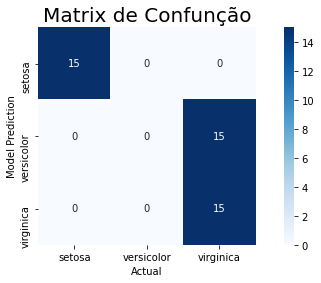

In [37]:
mat = confusion_matrix(Y_test, predict)

plt.figure(figsize=(10,4))
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
ax.set_xlabel('Actual')
ax.set_ylabel('Model Prediction')
ax.set_xticklabels(data.target_names)
ax.set_yticklabels(data.target_names)
ax.set_title('Matrix de Confunção', fontsize=20)
ax = plt.show()